In [1]:
from utils import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('../data/train_data_stg7.csv')
data_test = pd.read_csv('../data/test_data_stg7.csv')

In [3]:
wavelengths_path = '../data/wavelengths.npy'
wavelengths = np.load(wavelengths_path)

In [4]:
data['Intensities'] = data['Intensities'].apply(lambda x: eval(x) if isinstance(x, str) else x)

data['Time'] = pd.to_datetime(data['Time'])
data = data.sort_values(by='Time')

data_test['Intensities'] = data_test['Intensities'].apply(lambda x: eval(x) if isinstance(x, str) else x)

data_test['Time'] = pd.to_datetime(data_test['Time'])
data_test = data_test.sort_values(by='Time')

In [8]:
data.head()

,Time,L1-PL3-PZM52:Setpoint,L1-PL3-PZM53:Setpoint,L1-PL3-PZM56:Setpoint,L1-PL3-PZM57:Setpoint,L1-PL3-PZM58:Setpoint,L1-PL3-PZM59:Setpoint,L1-PL4-PZM66:Setpoint,L1-PL4-PZM67:Setpoint,L1-PL4-PZM68:Setpoint,L1-PL4-PZM69:Setpoint,L1-INJ-PM70:VAL_CAL,L1-OPA3-5_2-PM98:VAL_CAL,L1-INJ-PM70:VAL_CAL_diff,Intensities
39287,2024-11-21 10:14:13.954589367,-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,-0.17,6.79,0.11,"(-2.23, -1.31, -4.98, 4.81, 7.17, -5.02, 2.74,..."
77761,2024-11-21 10:14:14.964668751,-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,-0.17,6.85,0.21,"(1.77, -2.31, -4.98, 2.81, 8.17, -3.02, 4.74, ..."
135546,2024-11-21 10:14:16.018996716,-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,-0.06,7.30,0.27,"(-7.23, -2.31, -0.98, 3.81, 6.17, -6.02, 4.74,..."
97011,2024-11-21 10:14:17.021016121,-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,0.04,7.00,0.37,"(0.77, 0.69, -5.98, 4.81, 7.17, -3.02, 2.74, -..."
176528,2024-11-21 10:14:19.083452225,-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,0.20,6.68,0.33,"(-1.23, -4.31, -1.98, 7.81, 8.17, -3.02, 4.74,..."


In [9]:
data_test.head()

,Time,L1-PL3-PZM52:Setpoint,L1-PL3-PZM53:Setpoint,L1-PL3-PZM56:Setpoint,L1-PL3-PZM57:Setpoint,L1-PL3-PZM58:Setpoint,L1-PL3-PZM59:Setpoint,L1-PL4-PZM66:Setpoint,L1-PL4-PZM67:Setpoint,L1-PL4-PZM68:Setpoint,L1-PL4-PZM69:Setpoint,L1-INJ-PM70:VAL_CAL,L1-OPA3-5_2-PM98:VAL_CAL,L1-INJ-PM70:VAL_CAL_diff,Intensities
16587,2024-11-21 10:14:18.027237415,-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,0.10,7.41,0.32,"(-1.23, -1.31, -4.98, 4.81, 9.17, -2.02, 0.74,..."
15718,2024-11-21 10:14:20.094755173,-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,0.26,7.08,0.32,"(1.77, -3.31, -5.98, 3.81, 8.17, -2.02, 7.74, ..."
13396,2024-11-21 10:14:26.320841789,-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,0.74,6.84,0.27,"(-0.23, -6.31, -0.98, 7.81, 6.17, -6.02, 2.74,..."
16241,2024-11-21 10:14:48.207387924,-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,1.92,6.97,0.21,"(0.77, 0.69, -5.98, 3.81, 5.17, -3.02, 4.74, 2..."
6687,2024-11-21 10:14:59.671170235,-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,2.38,7.11,0.16,"(1.77, -3.31, -2.98, 7.81, 2.17, -7.02, 3.74, ..."


## Identify outliers

In [10]:
all_intensities = np.concatenate(data['Intensities'].values)

min_val = np.min(all_intensities)
max_val = np.max(all_intensities)
mean_val = np.mean(all_intensities)
median_val = np.median(all_intensities)
variance_val = np.var(all_intensities)

print(f"Minimum Intensity: {min_val}")
print(f"Maximum Intensity: {max_val}")
print(f"Mean Intensity: {mean_val}")
print(f"Median Intensity: {median_val}")
print(f"Variance of Intensities: {variance_val}")

Minimum Intensity: -33.7
Maximum Intensity: 1607.49
Mean Intensity: 107.75990381676257
Median Intensity: 7.22
Variance of Intensities: 30837.406475553442


Typical range: -16.28 to 845.77
Outliers: [-21.7 -20.7 -20.7 ... 852.2 -19.7 -18.7]


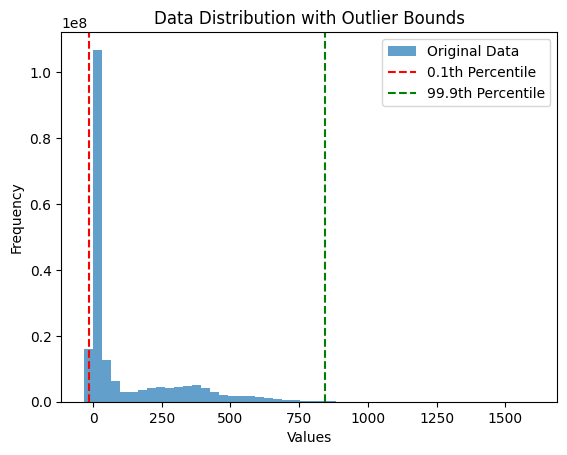

(np.float64(-16.28), np.float64(845.77))

In [11]:
all_intensities = np.concatenate(data['Intensities'])
analyze_outliers(all_intensities, 
                0.1, 
                99.9)

In [12]:
def plot_spectrogram_with_threshold(wavelengths,
                                    intensities,
                                    threshold_intensity,
                                    label="Spectrogram of Intensities by Wavelength"):
    """
    Create and display a spectrogram-like plot with a horizontal line at a given intensity value.

    Parameters:
        wavelengths (numpy.ndarray): 1D array of wavelength values.
        intensities (numpy.ndarray): 2D array where each row corresponds to intensities for a wavelength.
        threshold_intensity (float): The intensity value where a horizontal line should be drawn.
        label (str): Title of the spectrogram.

    Returns:
        None: Displays the spectrogram.
    """
    all_wavelengths = np.tile(wavelengths, len(intensities))
    all_intensities = np.concatenate(intensities)

    wavelength_bins = np.linspace(min(wavelengths), max(wavelengths), len(wavelengths) + 1)
    intensity_bins = np.linspace(min(all_intensities), max(all_intensities), 100)

    histogram, x_edges, y_edges = np.histogram2d(all_wavelengths, all_intensities, bins=[wavelength_bins, intensity_bins])

    plt.figure(figsize=(12, 6))
    plt.pcolormesh(x_edges, 
                   y_edges, 
                   histogram.T, 
                   shading='auto', 
                   cmap='viridis', 
                   norm=LogNorm(vmin=1, vmax=histogram.max()))
    plt.colorbar(label='Number of Occurrences (Log Scale)')
    plt.xlabel('Wavelengths')
    plt.ylabel('Intensities')
    plt.title(label)

    plt.axhline(y=threshold_intensity, color='red', linestyle='--', linewidth=2, label=f'Threshold: {threshold_intensity}')
    plt.legend()

    plt.tight_layout()
    plt.show()

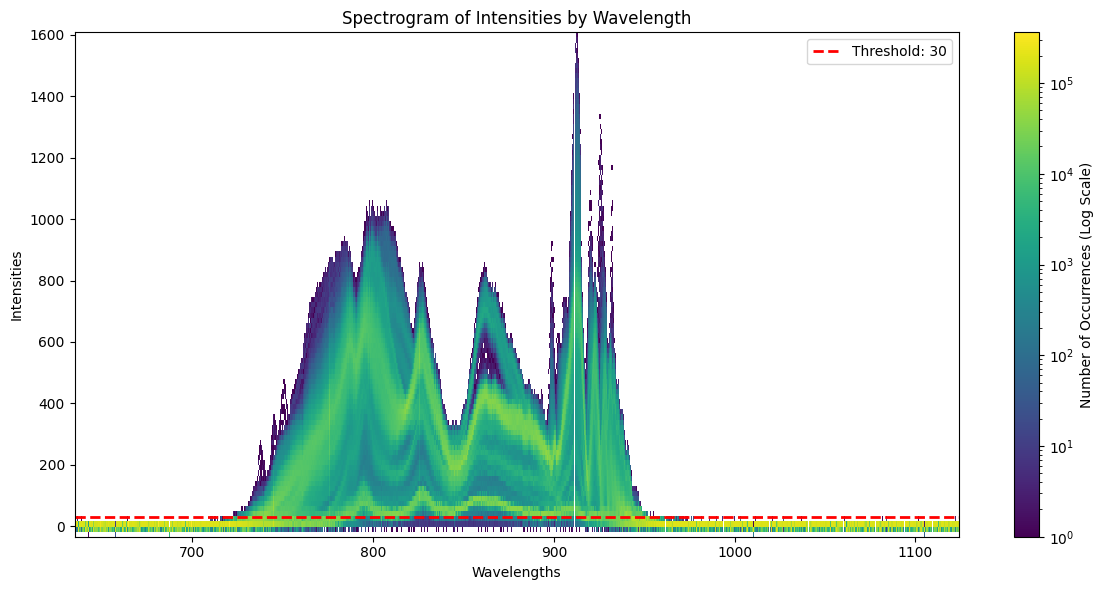

In [13]:
intensities = data['Intensities']
plot_spectrogram_with_threshold(wavelengths,
                                    intensities,
                                    threshold_intensity=30,
                                    label="Spectrogram of Intensities by Wavelength")

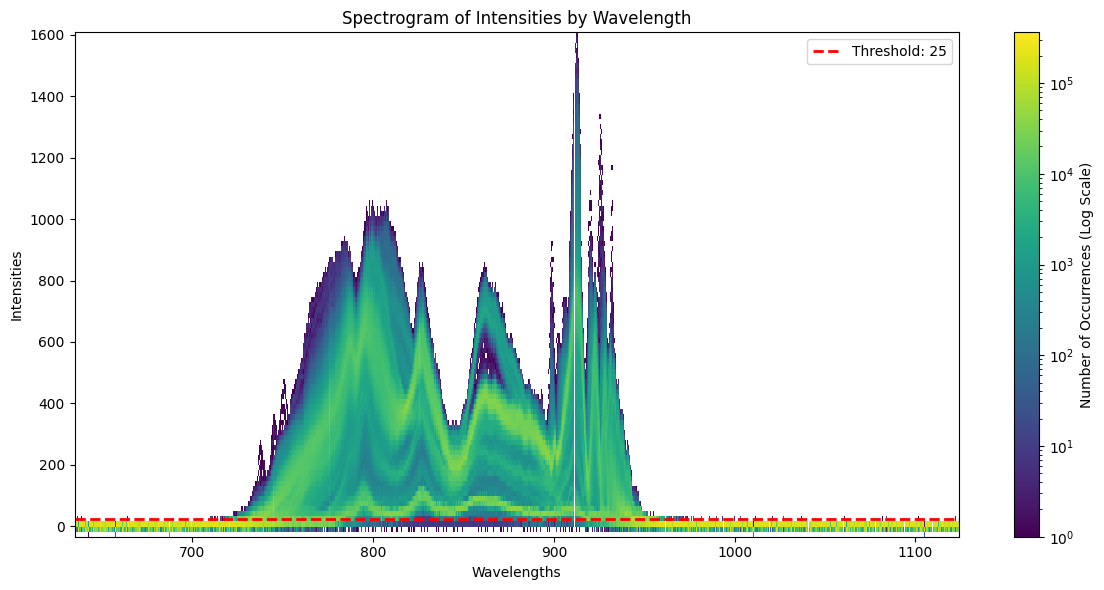

In [14]:
intensities = data['Intensities']
plot_spectrogram_with_threshold(wavelengths,
                                    intensities,
                                    threshold_intensity=25,
                                    label="Spectrogram of Intensities by Wavelength")

In [16]:
lower_bound_int = 30
upper_bound_int = max_val

## Normalization

In [17]:
data['Intensities'] = data['Intensities'].apply(lambda x: clip_and_normalize(x,
                                                                             lower_bound_int, 
                                                                             upper_bound_int, 
                                                                             norm_min=-1, 
                                                                             norm_max=1))
data.head()

,Time,L1-PL3-PZM52:Setpoint,L1-PL3-PZM53:Setpoint,L1-PL3-PZM56:Setpoint,L1-PL3-PZM57:Setpoint,L1-PL3-PZM58:Setpoint,L1-PL3-PZM59:Setpoint,L1-PL4-PZM66:Setpoint,L1-PL4-PZM67:Setpoint,L1-PL4-PZM68:Setpoint,L1-PL4-PZM69:Setpoint,L1-INJ-PM70:VAL_CAL,L1-OPA3-5_2-PM98:VAL_CAL,L1-INJ-PM70:VAL_CAL_diff,Intensities
39287,2024-11-21 10:14:13.954589367,-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,-0.17,6.79,0.11,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...."
77761,2024-11-21 10:14:14.964668751,-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,-0.17,6.85,0.21,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...."
135546,2024-11-21 10:14:16.018996716,-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,-0.06,7.30,0.27,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...."
97011,2024-11-21 10:14:17.021016121,-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,0.04,7.00,0.37,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...."
176528,2024-11-21 10:14:19.083452225,-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,0.20,6.68,0.33,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...."


In [18]:
data_test['Intensities'] = data_test['Intensities'].apply(lambda x: clip_and_normalize(x,
                                                                             lower_bound_int, 
                                                                             upper_bound_int, 
                                                                             norm_min=-1, 
                                                                             norm_max=1))
data_test.head()

,Time,L1-PL3-PZM52:Setpoint,L1-PL3-PZM53:Setpoint,L1-PL3-PZM56:Setpoint,L1-PL3-PZM57:Setpoint,L1-PL3-PZM58:Setpoint,L1-PL3-PZM59:Setpoint,L1-PL4-PZM66:Setpoint,L1-PL4-PZM67:Setpoint,L1-PL4-PZM68:Setpoint,L1-PL4-PZM69:Setpoint,L1-INJ-PM70:VAL_CAL,L1-OPA3-5_2-PM98:VAL_CAL,L1-INJ-PM70:VAL_CAL_diff,Intensities
16587,2024-11-21 10:14:18.027237415,-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,0.10,7.41,0.32,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...."
15718,2024-11-21 10:14:20.094755173,-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,0.26,7.08,0.32,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...."
13396,2024-11-21 10:14:26.320841789,-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,0.74,6.84,0.27,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...."
16241,2024-11-21 10:14:48.207387924,-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,1.92,6.97,0.21,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...."
6687,2024-11-21 10:14:59.671170235,-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,2.38,7.11,0.16,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...."


In [19]:
all_intensities = np.concatenate(data['Intensities'].values)

min_val = np.min(all_intensities)
max_val = np.max(all_intensities)
mean_val = np.mean(all_intensities)
median_val = np.median(all_intensities)
variance_val = np.var(all_intensities)

print(f"Minimum Intensity: {min_val}")
print(f"Maximum Intensity: {max_val}")
print(f"Mean Intensity: {mean_val}")
print(f"Median Intensity: {median_val}")
print(f"Variance of Intensities: {variance_val}")

Minimum Intensity: -1.0
Maximum Intensity: 1.0
Mean Intensity: -0.8812150220345281
Median Intensity: -1.0
Variance of Intensities: 0.044481827437219325


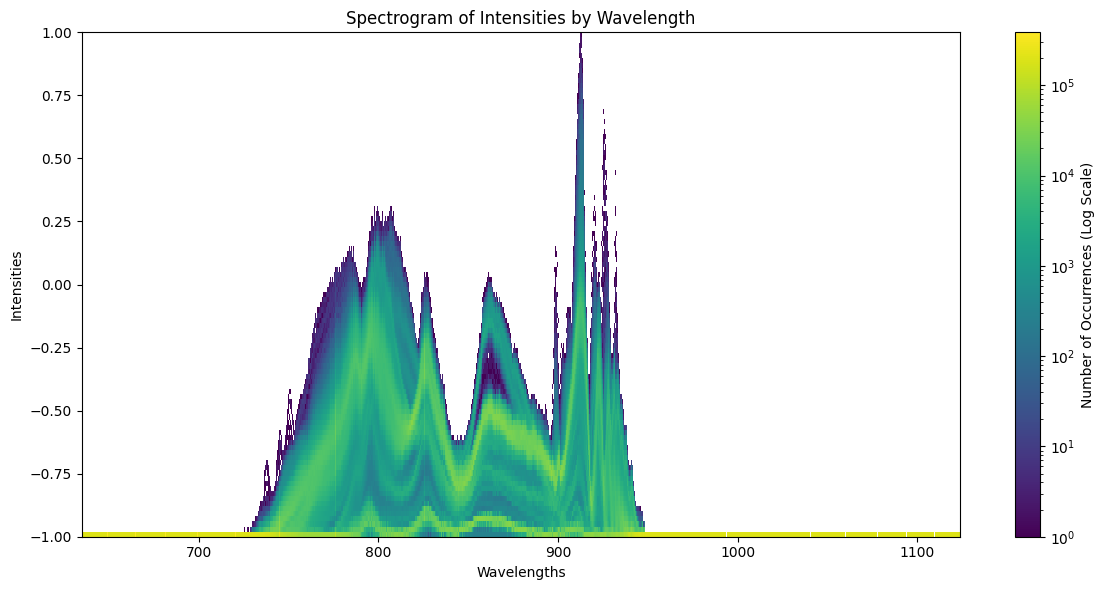

In [20]:
intensities = data['Intensities']

create_spectrogram(wavelengths, intensities, label="Spectrogram of Intensities by Wavelength")

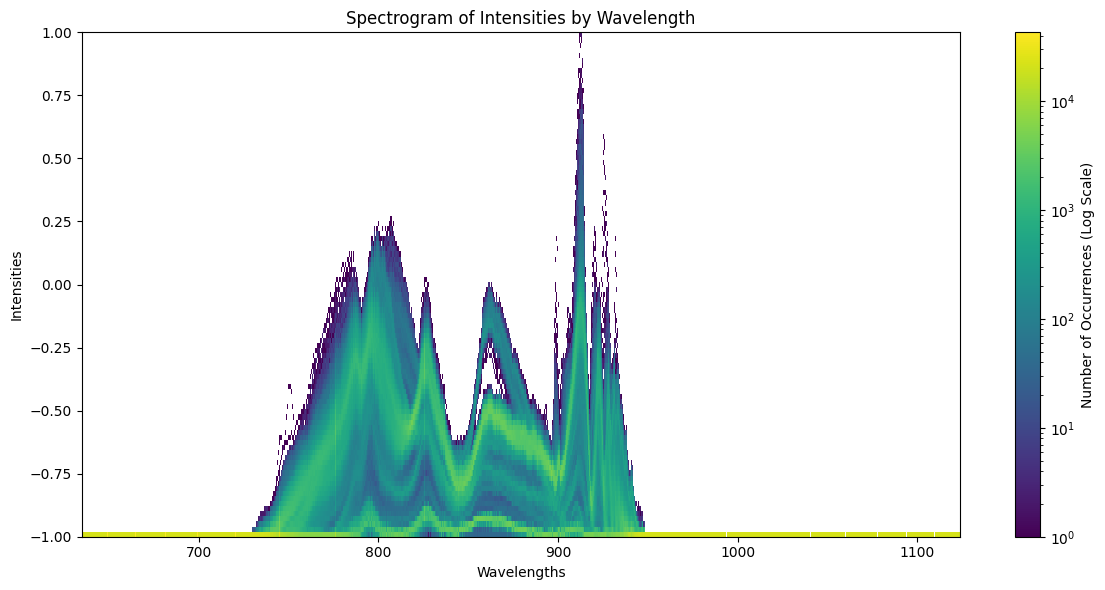

In [21]:
intensities_test = data_test['Intensities']

create_spectrogram(wavelengths, intensities_test, label="Spectrogram of Intensities by Wavelength")

## Save files

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192793 entries, 39287 to 63778
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Time                      192793 non-null  datetime64[ns]
 1   L1-PL3-PZM52:Setpoint     192793 non-null  float64       
 2   L1-PL3-PZM53:Setpoint     192793 non-null  float64       
 3   L1-PL3-PZM56:Setpoint     192793 non-null  float64       
 4   L1-PL3-PZM57:Setpoint     192793 non-null  float64       
 5   L1-PL3-PZM58:Setpoint     192793 non-null  float64       
 6   L1-PL3-PZM59:Setpoint     192793 non-null  float64       
 7   L1-PL4-PZM66:Setpoint     184050 non-null  float64       
 8   L1-PL4-PZM67:Setpoint     184044 non-null  float64       
 9   L1-PL4-PZM68:Setpoint     184044 non-null  float64       
 10  L1-PL4-PZM69:Setpoint     184044 non-null  float64       
 11  L1-INJ-PM70:VAL_CAL       192793 non-null  float64       
 12  L1-O

In [27]:
parameters_columns = [
    "L1-PL3-PZM52:Setpoint", "L1-PL3-PZM53:Setpoint", "L1-PL3-PZM56:Setpoint",
    "L1-PL3-PZM57:Setpoint", "L1-PL3-PZM58:Setpoint", "L1-PL3-PZM59:Setpoint",
    "L1-PL4-PZM66:Setpoint", "L1-PL4-PZM67:Setpoint", "L1-PL4-PZM68:Setpoint",
    "L1-PL4-PZM69:Setpoint", "L1-INJ-PM70:VAL_CAL", "L1-OPA3-5_2-PM98:VAL_CAL",
    "L1-INJ-PM70:VAL_CAL_diff"
]

data["cond_vector"] = data[parameters_columns].values.tolist()
data.drop(parameters_columns, axis=1, inplace=True)

data.head()

,Time,Intensities,cond_vector
39287,2024-11-21 10:14:13.954589367,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[-0.3478, -0.4151, -0.8214, -1.6029, -2.0, -1...."
77761,2024-11-21 10:14:14.964668751,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[-0.3478, -0.4151, -0.8214, -1.6029, -2.0, -1...."
135546,2024-11-21 10:14:16.018996716,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[-0.3478, -0.4151, -0.8214, -1.6029, -2.0, -1...."
97011,2024-11-21 10:14:17.021016121,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[-0.3478, -0.4151, -0.8214, -1.6029, -2.0, -1...."
176528,2024-11-21 10:14:19.083452225,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[-0.3478, -0.4151, -0.8214, -1.6029, -2.0, -1...."


In [30]:
data_test["cond_vector"] = data_test[parameters_columns].values.tolist()
data_test.drop(parameters_columns, axis=1, inplace=True)

data_test.head()

,time,intensities,cond_vector
16587,2024-11-21 10:14:18.027237415,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[-0.3478, -0.4151, -0.8214, -1.6029, -2.0, -1...."
15718,2024-11-21 10:14:20.094755173,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[-0.3478, -0.4151, -0.8214, -1.6029, -2.0, -1...."
13396,2024-11-21 10:14:26.320841789,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[-0.3478, -0.4151, -0.8214, -1.6029, -2.0, -1...."
16241,2024-11-21 10:14:48.207387924,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[-0.3478, -0.4151, -0.8214, -1.6029, -2.0, -1...."
6687,2024-11-21 10:14:59.671170235,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[-0.3478, -0.4151, -0.8214, -1.6029, -2.0, -1...."


In [31]:
data = data.rename(columns={"Time": "time", "Intensities": "intensities"})
data_test = data_test.rename(columns={"Time": "time", "Intensities": "intensities"})

In [32]:
data['intensities'] = data['intensities'].apply(lambda x: ','.join(map(str, x)))
data_test['intensities'] = data_test['intensities'].apply(lambda x: ','.join(map(str, x)))

In [33]:
data.to_csv('../data/train_data_stg7_norm.csv', index=False)
data_test.to_csv('../data/test_data_stg7_norm.csv', index=False)

In [34]:
data.head()

,time,intensities,cond_vector
39287,2024-11-21 10:14:13.954589367,"-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-...","[-0.3478, -0.4151, -0.8214, -1.6029, -2.0, -1...."
77761,2024-11-21 10:14:14.964668751,"-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-...","[-0.3478, -0.4151, -0.8214, -1.6029, -2.0, -1...."
135546,2024-11-21 10:14:16.018996716,"-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-...","[-0.3478, -0.4151, -0.8214, -1.6029, -2.0, -1...."
97011,2024-11-21 10:14:17.021016121,"-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-...","[-0.3478, -0.4151, -0.8214, -1.6029, -2.0, -1...."
176528,2024-11-21 10:14:19.083452225,"-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-...","[-0.3478, -0.4151, -0.8214, -1.6029, -2.0, -1...."
